# **Intro: K Nearest Neighbors**

considertion:


> 1. Choosing K
2. Distance Metrice





In [1]:
import numpy as np


#Define two points
point1 = np.array([1, 2])
point2 = np.array([4, 6])

distance = np.sqrt(np.sum(np.square(point1 -point2)))
print(f'The Euclidean distance between two points: {distance}')

The Euclidean distance between two points: 5.0


In [35]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Class 0 - good students
x0 = np.random.normal( loc= 2.0, scale=0.5, size=(50, 2))
y0 = np.zeros(50)

# Class 1 - bad students
x1 = np.random.normal( loc= 2.0, scale=0.5, size=(50, 2))
y1 = np.ones(50)

In [36]:
y0

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [38]:
y1

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [39]:
X = np.vstack((x0, x1))
y = np.hstack((y0, y1))

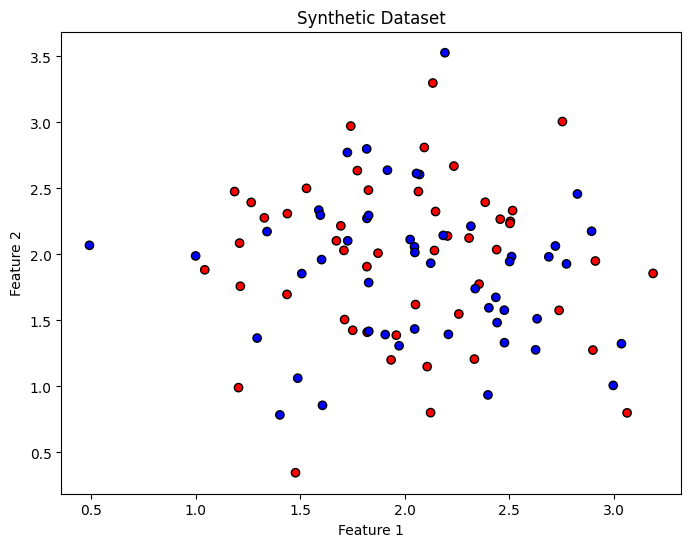

In [40]:
# Plotting the dataset

plt.figure(figsize =(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap = ListedColormap(['#ff0000', '#0000ff']), edgecolors= 'k')
plt.title("Synthetic Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)

In [41]:
def plot_knn_decision_boundary(k):
  #Create a mesh grid
  h = .02
  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                       np.arange(y_min, y_max, h))

  # train KNN
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)


  # Predict and plot
  Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  plt.figure(figsize=(8,6))
  plt.contourf(xx, yy, Z, alpha = 0.8, cmap=ListedColormap(['#FFAAAA', '#AAAAFF']))
  plt.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(['#FF0000', '#0000FF']), edgecolors='k')
  plt.title(f"KNN Decision Boundary with k={k}")
  plt.xlabel("Feature 1")
  plt.ylabel("Feature 2")
  plt.show()

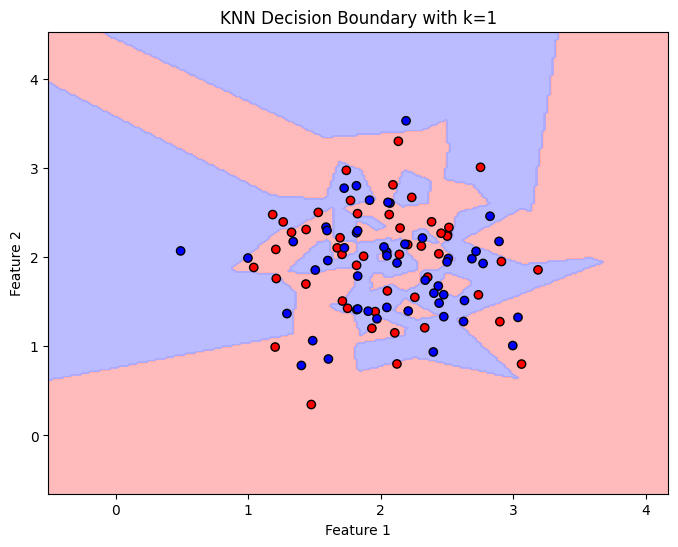

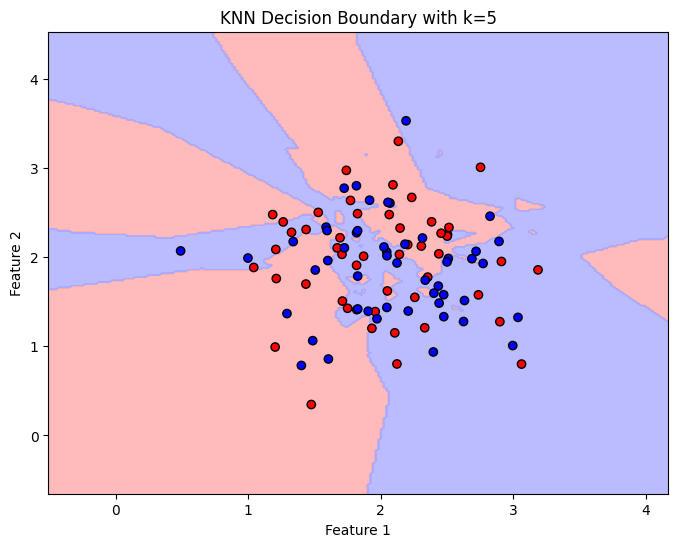

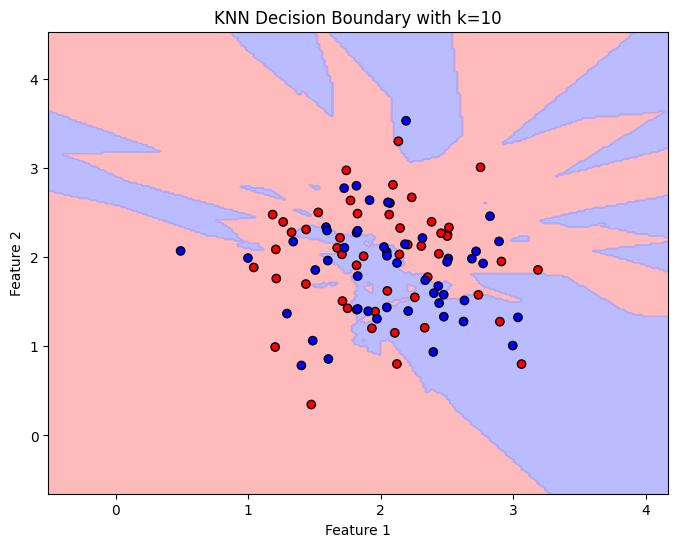

In [42]:
for k in [1, 5, 10]:
  plot_knn_decision_boundary(k)

In [56]:
def eucleadian_distance(point1, point2):
  return np.sqrt(np.sum(np.square(point1 - point2)))


def find_nearest_neighbors(training_data, test_point, k):
  distances = []
  for train_point in training_data:
    distance = eucleadian_distance(test_point, train_point)
    distances.append(distance)

  # sort the distances
  sorted_distances = np.argsort(distances)
  k_nearest_neighbors = sorted_distances[:k]
  return k_nearest_neighbors.astype(int)

In [57]:
def predict_class(train_class, neighbor_indices):
  neighbor_classes = train_class[neighbor_indices]

  class_votes = {}

  for label in neighbor_classes:
    if label in class_votes:
      class_votes[label] += 1
    else:
      class_votes[label] = 1

  most_common_class = max(class_votes, key = class_votes.get)
  return most_common_class

In [58]:
# our implementation practice
nearest_neighbors = find_nearest_neighbors(X_train, point1, 5)

nearest_neighbors

array([62, 32, 54, 79, 43])

In [60]:
predict_class(y_train, nearest_neighbors)

1.0

In [63]:
# # #example
# # a = [4, 2, 1, 4, 2, 8, 7, 6]

# # asorted = sorted(a)
# # print(asorted)
# # print(np.argsort(a))

# nearest_neighbor_classes = ['bus', 'truck', 'bus']
# class_votes = {}

# for label in nearest_neighbor_classes:
#   if label in class_votes:
#     class_votes[label] += 1
#   else:
#     class_votes[label] = 1

# print(class_votes)
# most_common_class = max(class_votes, key=class_votes.get)
# print(most_common_class)